# Gradient Descent and Stochastic Gradient Descent

Our goal is to minimize a convex differentiable function $f: \mathbb{R}^p \to \mathbb{R}$ using an iterative scheme. We implement here two such algorithms:
* Gradient Descent
* Stochastic Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Gradient Descent

### The intuition behind Gradient Descent

The idea is to follow the direction of steepest descent. At point $\theta \in \mathbb{R}^p$, the steepest descent direction is given by $- \nabla f(\theta)$. This suggests constructing a sequence $\theta_1, \ldots, \theta_T$ by iterating the formula:
$$\theta_{k+1} = \theta_k - \gamma_k \nabla f(\theta_k)$$
where $\gamma_k > 0$ is a step-size. If the number of iterations $n$ is large enough, and if $(\gamma_k)$ is well chosen, we can hope that the sequence $(\theta_n)$ will converge to a point $\theta^*$ minimizing $f$.

<img style="margin-left:0" width="300px" src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg" style="align:center" />

__Remark:__ If we only wish to minimize $f$ on a compact convex subset $\Omega \subset \mathbb{R}^p$, we can use Projected Gradient Descent: at each step of gradient descent, we project back onto $\Omega$, i.e.:
$$\theta_{k+1} = \Pi_\Omega \left[\theta_k - \gamma_k \nabla f(\theta_k) \right]$$
where $\Pi_\Omega: \mathbb{R}^p \to \Omega$ is the projection onto $\Omega$:
$$\|\theta - \Pi_\Omega(\theta)\| = \min_{\omega \in \Omega} \|\theta - \omega\|$$

### Theoretical results
 For both Gradient Descent and Projected Gradient Descent, we have the following results.
 
* If $f$ is a $L$-smooth function with minimum in $\theta^*$, and if $\gamma_k = \frac{1}{L}$, then:
$$ f(\theta_k) - f(\theta^*) \leq \frac{2L\|\theta_0-\theta^*\|^2}{k+4}$$
* If moreover $f$ if $\mu$-strongly convex, then:
$$ f(\theta_k) - f(\theta^*) \leq \left(1 - \frac{\mu}{L}\right)^k \left[ f(\theta_0) - f(\theta^*) \right]$$

The rate of convergence of Gradient Descent adpats to strong-convexity (i.e. to the difficulty of the problem)


*(Proofs of these results, as well as many other interestings results in optimization for Machine Learning, can be found in Francis Bach's slides : https://www.di.ens.fr/~fbach/fbach_orsay_2019.pdf)*

### A first example: least squares

Let $X \in \mathbb{R}^{n \times p}$ and $y \in \mathbb{R}^n$. We wish to minimize the function
$$f(\theta) = \frac{1}{2}\|y - X\theta\|^2.$$

Here, we suppose that the observations $y$ were obtained by linear combination of data $X$, plus some noise $\sigma \xi$:
$$ y = X w + \sigma \xi $$
with $\sigma > 0$ noise level and $\xi \sim \mathcal{N}(0,I)$.

We know that the minimum of $f$ is attained at
$$\theta^* = (X^T X)^{-1} X^T y$$

In [3]:
# Definition of the data
n, p = 10, 5

X = np.random.randn(n,p)
w = np.random.randn(p)

sigma = 1.
xi = np.random.randn(n)

y = X.dot(w) + sigma*xi

In [4]:
# Definition of function f and its gradient
def f(theta):
    '''Return the least squares error at point `theta`.'''
    return 0.5 * np.linalg.norm(y - X.dot(theta))**2

def grad_f(theta):
    '''Return the gradient of least squares error at point `theta`.'''
    return - X.T.dot(y - X.dot(theta))

In [5]:
# Minimum of f
theta_star = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print('The minimum value of function `f` is =', f(theta_star))
print('It is attained at point theta^* =', theta_star)

The minimum value of function `f` is = 1.98931046929296
It is attained at point theta^* = [-0.83984701  0.90368274  1.61756197  0.53540053 -0.32359244]


Before running Gradient Descent, we need to set the step size $\gamma = \frac{1}{L}$, where $L$ is the Lipschitz constant of $\nabla f$. Using the definition of the operator norm:

$$ \| \nabla f(\theta) - \nabla f(\vartheta) \| \leq |||X^T X||| \times \|\theta - \vartheta\| $$
so that $L = |||X^T X|||$.

We can now run Gradient Descent.

In [5]:
# Number of iterations to be run
max_iter = 100

# Lists to save the sequences theta, f(theta), grad_f(theta)
theta_history = []
f_history = []
grad_f_history = []

# Step size
L = np.linalg.norm(X.T.dot(X), ord=2)
step_size = 1. / L

# Random initial point
theta = np.random.randn(p)

# Gradient Descent Iterations
for t in range(max_iter):
    theta = theta - step_size * grad_f(theta)
    
    theta_history.append(theta)
    f_history.append(f(theta))
    grad_f_history.append(grad_f(theta))

We can vizualize the convergence of Gradient Descent in three different ways:
* The sequence $f(\theta_k) - f(\theta^*) \rightarrow 0$
* The sequence $\|\nabla f(\theta_k)\| \rightarrow 0$
* The sequence $\theta_k \rightarrow \theta^*$

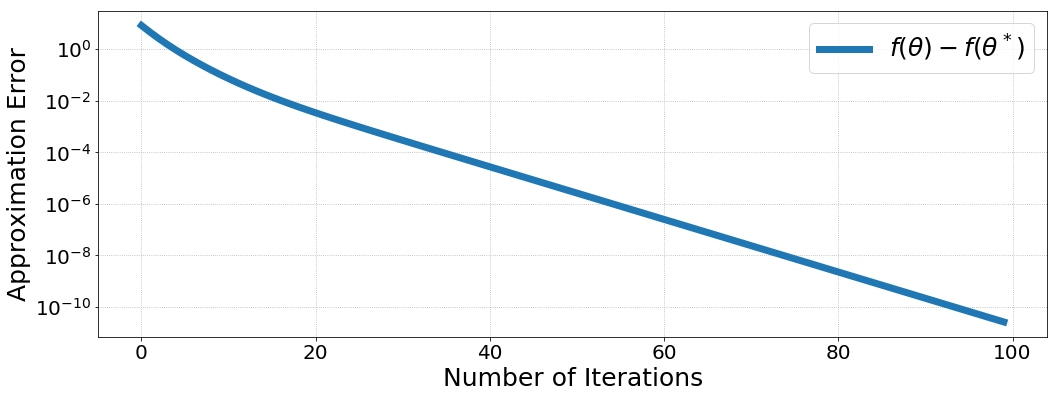

In [6]:
# Let us now plot the convergence in terms of values of `f`

plt.figure(figsize=(17,6))
plt.semilogy(f_history-f(theta_star), label='$f(\\theta) - f(\\theta^*)$', lw=7)
plt.grid(ls=':')
plt.legend(loc='best', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Iterations', fontsize=25)
plt.ylabel('Approximation Error', fontsize=25)
plt.show()

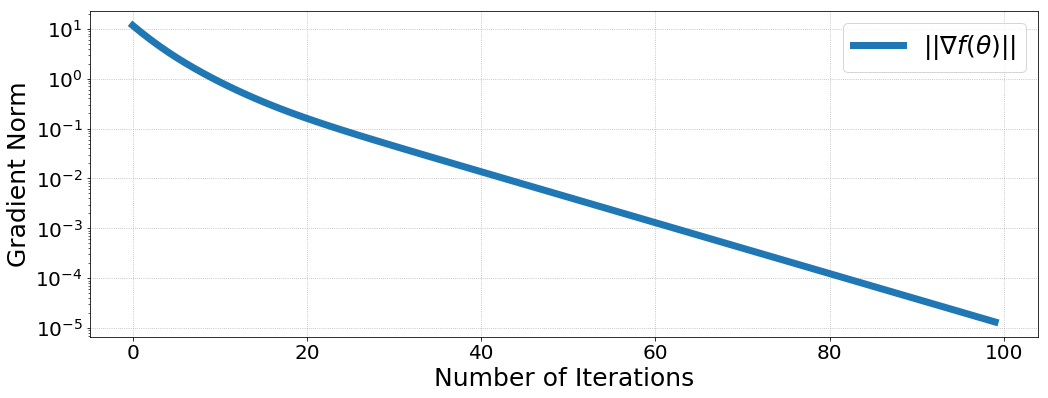

In [7]:
# Let us now plot the convergence in terms of the gradient of `f`

plt.figure(figsize=(17,6))
plt.semilogy([np.linalg.norm(g) for g in grad_f_history], label='$||\\nabla f(\\theta)||$', lw=7)
plt.grid(ls=':')
plt.legend(loc='best', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Iterations', fontsize=25)
plt.ylabel('Gradient Norm', fontsize=25)
plt.show()

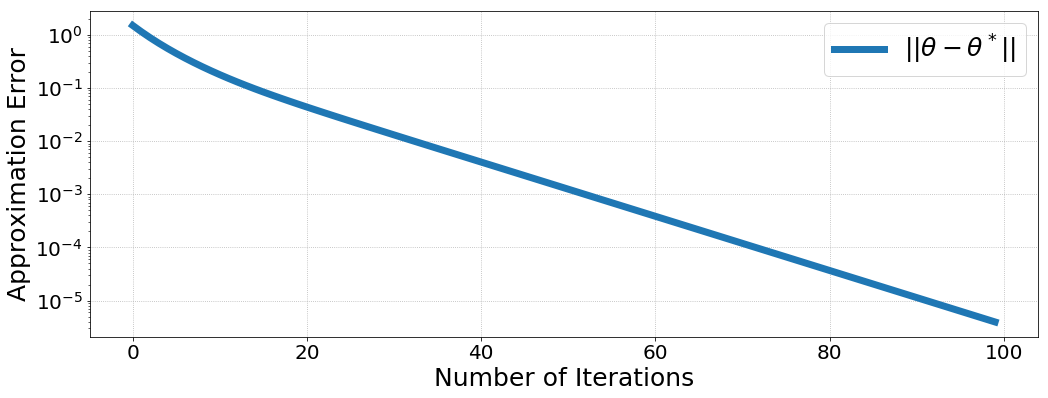

In [8]:
# Let us now plot the convergence in terms of the norm of `theta`

plt.figure(figsize=(17,6))
plt.semilogy([np.linalg.norm(theta - theta_star) for theta in theta_history], label='$||\\theta - \\theta^*||$', lw=7)
plt.grid(ls=':')
plt.legend(loc='best', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Iterations', fontsize=25)
plt.ylabel('Approximation Error', fontsize=25)
plt.show()

### A second example: logistic regression

We have data $x_1, \ldots, x_n \in \mathbb{R}^n$ that belong to one of the two classes $1$ or $-1$, and we write $y_i$ th class of datum $x_i$. We suppose that we observe noisy clusters that are originally linearly separable, i.e.
$$ y_i = \text{sign} \left( w^T x_i + \sigma \xi_i \right) $$
where $\sigma > 0$ is the noise level and $\xi_1, \ldots, \xi_n \sim \mathcal{N}(0,1)$ are i.i.d.

We want to learn a logistic regressor on this data, i.e. we want to find $\theta^* \in \mathbb{R}^p$ minimizing
$$ f(\theta) = \frac{1}{n}\sum_{i=1}^n \log\left( 1 + e^{-y_i \theta^T x_i} \right) $$

In [9]:
# Definition of the data
n, p = 10, 5

X = np.random.randn(n, p)
w = np.random.randn(p)

sigma = 1
xi = np.random.randn(n)

y = np.sign(X.dot(w) + sigma*xi)

In [10]:
def f(theta):
    '''Return the logistic loss for parameters `theta`.'''
    return np.mean(np.log(1.0 + np.exp(-y*X.dot(theta))))

We need to compute the gradient of $f$ at point $\theta$:
$$ \nabla f(\theta) = \frac{1}{n}\sum_{i=1}^n \frac{-y_i}{1 + \exp\left( y_i x_i^T \theta \right)} x_i $$

In [11]:
# Definition of the gradient of f
def grad_f(theta):
    '''Return the gardient of the logistic loss `f` at point `theta`.'''
    return (1./n)*(-y/(1 + np.exp(y * X.dot(theta)))).dot(X)

In [12]:
# Number of iterations to be run
max_iter = 100

# Lists to save the sequences theta, f(theta), grad_f(theta)
theta_history = []
f_history = []
grad_f_history = []

# Step size
L = np.linalg.norm((1./n)*X.T.dot(X), ord=2)
step_size = 1/L

# Random initial point
theta = np.random.randn(p)

# Gradient Descent Iterations
for t in range(max_iter):
    theta = theta - step_size * grad_f(theta)
    
    theta_history.append(theta)
    f_history.append(f(theta))
    grad_f_history.append(grad_f(theta))

We can now vizualize the convergence in terms of the values of $f$ and in terms of the norm of its gradient.

The convergence is slower than for the least square regression. Both functions are smooth, but the logistic loss is not strongly convex. Theory then tells us that the convergence will be in $\mathcal{O}(1/k)$ instead of $\mathcal{O}(e^{-k})$.

In [13]:
min_f = np.min(f_history)

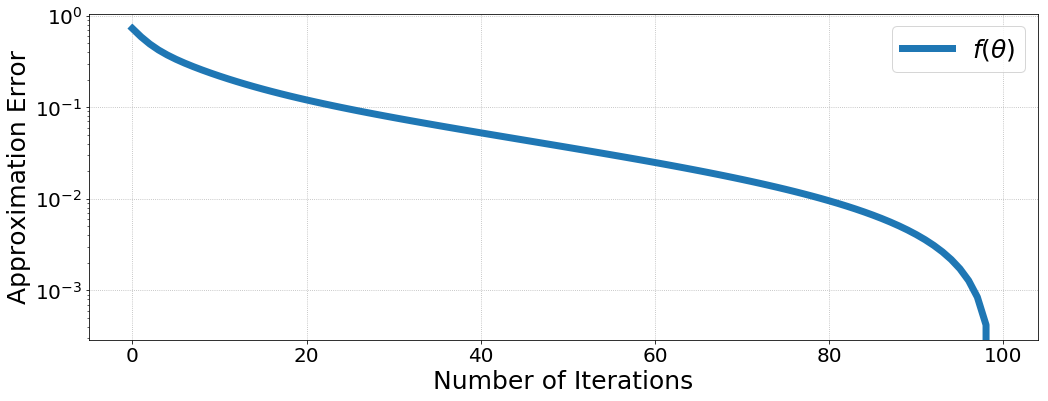

In [14]:
# Let us now plot the convergence in terms of values of `f`

plt.figure(figsize=(17,6))
plt.semilogy(f_history-min_f, label='$f(\\theta)$', lw=7)
plt.grid(ls=':')
plt.legend(loc='best', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Iterations', fontsize=25)
plt.ylabel('Approximation Error', fontsize=25)
plt.show()

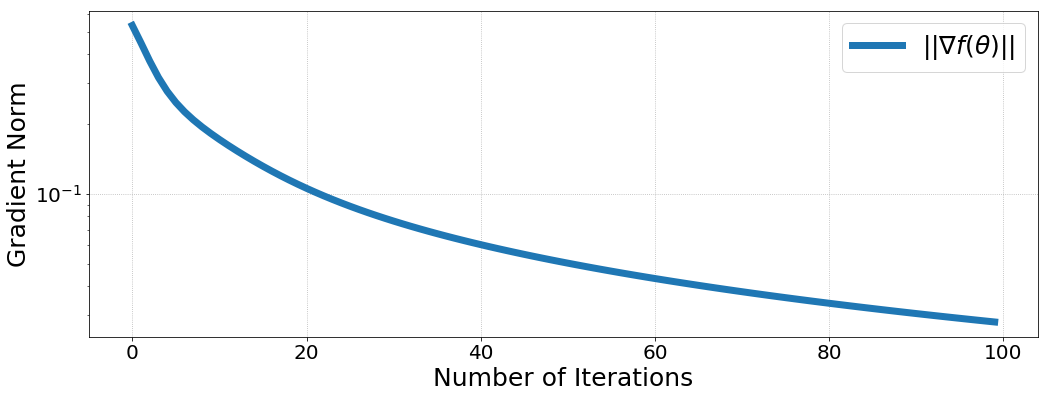

In [15]:
# Let us now plot the convergence in terms of the gradient of `f`

plt.figure(figsize=(17,6))
plt.semilogy([np.linalg.norm(g) for g in grad_f_history], label='$||\\nabla f(\\theta)||$', lw=7)
plt.grid(ls=':')
plt.legend(loc='best', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Iterations', fontsize=25)
plt.ylabel('Gradient Norm', fontsize=25)
plt.show()

## 2. Stochastic Gradient Descent

### The Intuition behind Stochastic Gradient Descent

We wish to minimize a convex function $f : \mathbb{R}^p \to \mathbb{R}$ of the form
$$ f: \theta \to \sum_{i=1}^n f_i(\theta) $$
where $f_1, \ldots, f_n : \mathbb{R}^p \to \mathbb{R}$ are smooth differentiable functions. In Machine Learning, such functions appear all the time with $f_i(\theta)$ being the loss of the $i$-th datum.

When the number of data $n$ becomes very large, as it is in real applications, computing the gradient of $f$ at each iteration of Gradient Descent may be too time consuming. Instead, we can only compute the gradient on one randomly-chosen datum $x_i$. We may need more iterations, but each iteration becomes very fast to compute.

We thus consider the iterations:
* Choose $i \in [1 ; n]$ uniformly at random
* $\theta_{k+1} = \theta_k - \gamma_k \nabla f_i(\theta_k)$

__Choice of step size $\gamma_k$:__ Can be taken constant, or $\approx 1/\sqrt{k}$. *(More details can be found in https://www.di.ens.fr/~fbach/fbach_orsay_2019.pdf)*

__Polyak-Rupert averaging:__ Instead of choosing for a minimizer $\hat\theta = \theta_T$, i.e. the last computed value of $\theta_k$, it is often better to choose $\hat\theta = \frac{1}{T} \sum_{k=1}^T \theta_k$.

![](http://www.holehouse.org/mlclass/17_Large_Scale_Machine_Learning_files/Image%20[16].png)

### A first example: least squares

Let $X \in \mathbb{R}^{n \times p}$ and $y \in \mathbb{R}^n$. We wish to minimize the function
$$f(\theta) = \frac{1}{2}\|y - X\theta\|^2.$$

Here, we suppose that the observations $y$ were obtained by linear combination of data $X$, plus some noise $\sigma \xi$:
$$ y = X w + \sigma \xi $$
with $\sigma > 0$ noise level and $\xi \sim \mathcal{N}(0,I)$.

We know that the minimum of $f$ is attained at
$$\theta^* = (X^T X)^{-1} X^T y$$

In [16]:
# Definition of the data
n, p = 10, 5

X = np.random.randn(n,p)
w = np.random.randn(p)

sigma = 1.
xi = np.random.randn(n)

y = X.dot(w) + sigma*xi

In [17]:
# Definition of function f and its gradient
def f(theta):
    '''Return the least squares error at point `theta`.'''
    return 0.5 * np.linalg.norm(y - X.dot(theta))**2

def grad_f(theta, i):
    '''Return the gradient of least squares error at point `theta` for datum `i`.'''
    return - X[i]*(y[i] - X[i].dot(theta))

In [18]:
# Minimum of f
theta_star = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print('The minimum value of function `f` is =', f(theta_star))
print('It is attained at point theta^* =', theta_star)

The minimum value of function `f` is = 1.246452002604383
It is attained at point theta^* = [-1.03894394 -1.74816408 -0.34959071  0.60880194 -0.8318496 ]


In [19]:
# Number of iterations to be run
max_iter = 100*n

# Lists to save the sequences theta, f(theta), theta_averaged, f(theta_averaged)
theta_history = []
f_history = []
theta_averaged_history = []
f_averaged_history = []

# Step size
L = np.linalg.norm(X.T.dot(X), ord=2)
step_size = 1. / L

# Random initial point
theta = np.random.randn(p)
theta_averaged = np.random.randn(p)

# Gradient Descent Iterations
for t in range(max_iter):
    i = np.random.randint(0, n)
    
    theta = theta - step_size * grad_f(theta, i)
    theta_averaged = (t*theta_averaged + theta)/(t+1)
    
    theta_history.append(theta)
    f_history.append(f(theta))
    theta_averaged_history.append(theta_averaged)
    f_averaged_history.append(f(theta_averaged))

We can vizualize the convergence of Stochastic Gradient Descent for both the `last theta` and `averaged theta` approaches, in terms of:
* The sequence $f(\theta_k) - f(\theta^*) \rightarrow 0$
* The sequence $\theta_k \rightarrow \theta^*$

While the `last theta` approach is faster at the beginning, it oscillates after a while. On the other hand, the `averaged theta` approach is a bit slower at the beginning, but continues to improve even after many iterations.

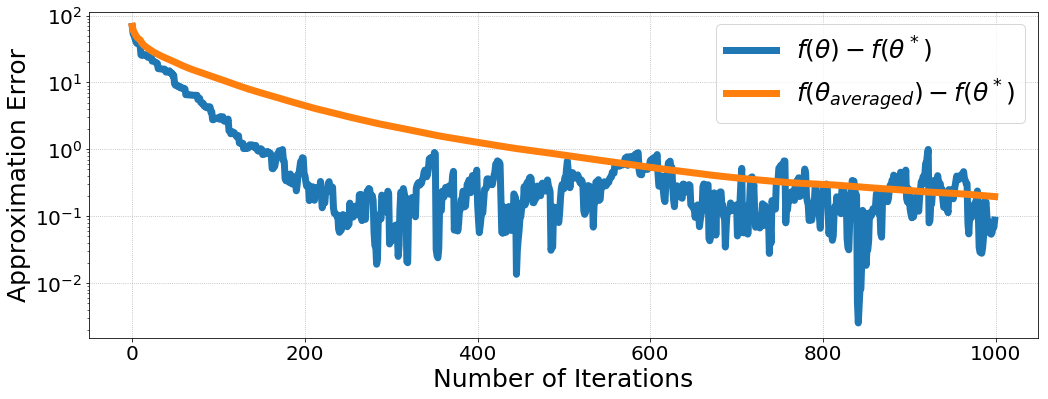

In [20]:
# Let us now plot the convergence in terms of values of `f`

plt.figure(figsize=(17,6))
plt.semilogy(f_history-f(theta_star), label='$f(\\theta) - f(\\theta^*)$', lw=7)
plt.semilogy(f_averaged_history-f(theta_star), label='$f(\\theta_{averaged}) - f(\\theta^*)$', lw=7)
plt.grid(ls=':')
plt.legend(loc='best', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Iterations', fontsize=25)
plt.ylabel('Approximation Error', fontsize=25)
plt.show()

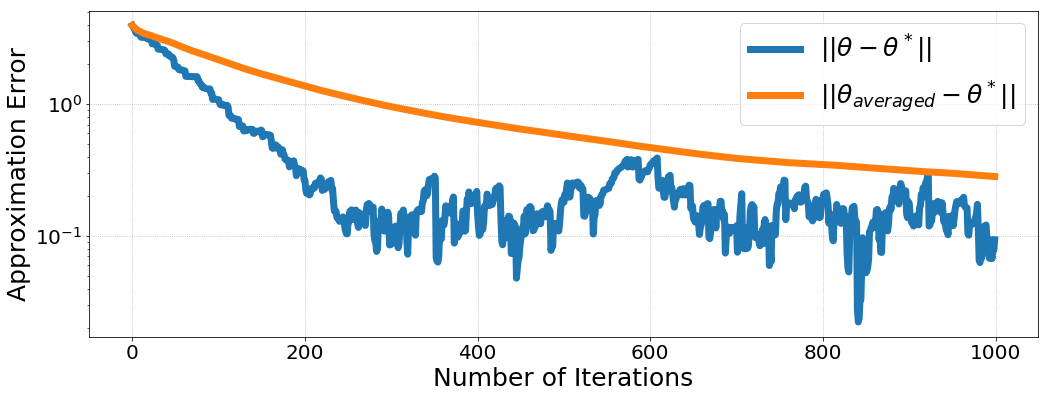

In [21]:
# Let us now plot the convergence in terms of the norm of `theta`

plt.figure(figsize=(17,6))
plt.semilogy([np.linalg.norm(theta - theta_star) for theta in theta_history], label='$||\\theta - \\theta^*||$', lw=7)
plt.semilogy([np.linalg.norm(theta - theta_star) for theta in theta_averaged_history], label='$||\\theta_{averaged} - \\theta^*||$', lw=7)
plt.grid(ls=':')
plt.legend(loc='best', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Iterations', fontsize=25)
plt.ylabel('Approximation Error', fontsize=25)
plt.show()

### A second example: logistic regression

We have data $x_1, \ldots, x_n \in \mathbb{R}^n$ that belong to one of the two classes $1$ or $-1$, and we write $y_i$ th class of datum $x_i$. We suppose that we observe noisy clusters that are originally linearly separable, i.e.
$$ y_i = \text{sign} \left( w^T x_i + \sigma \xi_i \right) $$
where $\sigma > 0$ is the noise level and $\xi_1, \ldots, \xi_n \sim \mathcal{N}(0,1)$ are i.i.d.

We want to learn a logistic regressor on this data, i.e. we want to find $\theta^* \in \mathbb{R}^p$ minimizing
$$ f(\theta) = \frac{1}{n}\sum_{i=1}^n \log\left( 1 + e^{-y_i \theta^T x_i} \right) $$

In [22]:
# Definition of the data
n, p = 100, 5

X = np.random.randn(n, p)
w = np.random.randn(p)

sigma = 1
xi = np.random.randn(n)

y = np.sign(X.dot(w) + sigma*xi)

In [23]:
def f(theta):
    '''Return the logistic loss for parameters `theta`.'''
    return np.mean(np.log(1.0 + np.exp(-y*X.dot(theta))))

In [24]:
# Definition of the gradient of f
def grad_f(theta, i):
    '''Return the gardient of the logistic loss `f` at point `theta` for datum `i`.'''
    return (1./n)*(-y[i]/(1 + np.exp(y[i] * X[i].dot(theta))))*X[i]

In [25]:
# Number of iterations to be run
max_iter = 1000*n

# Lists to save the sequences theta, f(theta), theta_averaged, f(theta_averaged)
theta_history = []
f_history = []
theta_averaged_history = []
f_averaged_history = []

# Step size
L = np.linalg.norm((1./n)*X.T.dot(X), ord=2)
step_size = 1./L

# Random initial point
theta = np.random.randn(p)

# Gradient Descent Iterations
for t in range(max_iter):
    i = np.random.randint(0, n)
    
    theta = theta - step_size * grad_f(theta, i)
    theta_averaged = (t*theta_averaged + theta)/(t+1)
    
    theta_history.append(theta)
    f_history.append(f(theta))
    theta_averaged_history.append(theta_averaged)
    f_averaged_history.append(f(theta_averaged))

In [26]:
# Define the approximative minimum value of `f`
min_f = np.min([np.min(f_history), np.min(f_averaged_history)])

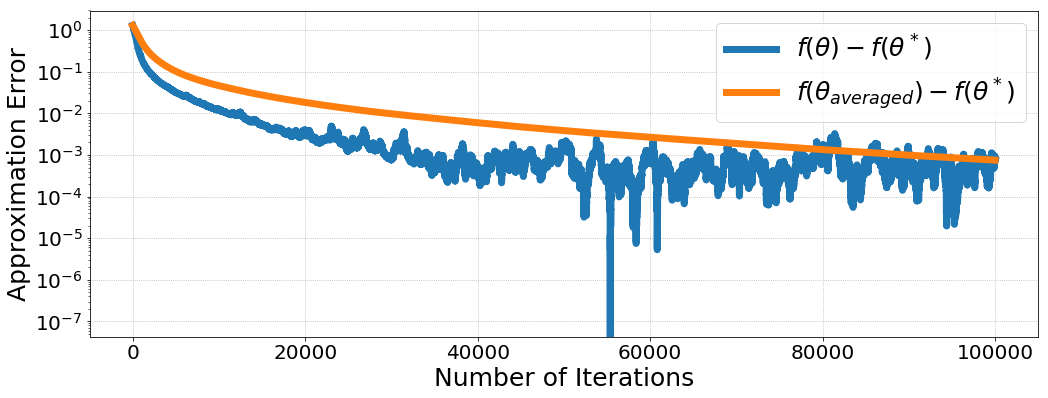

In [27]:
# Let us now plot the convergence in terms of values of `f`

plt.figure(figsize=(17,6))
plt.semilogy(f_history-min_f, label='$f(\\theta) - f(\\theta^*)$', lw=7)
plt.semilogy(f_averaged_history-min_f, label='$f(\\theta_{averaged}) - f(\\theta^*)$', lw=7)
plt.grid(ls=':')
plt.legend(loc='best', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Iterations', fontsize=25)
plt.ylabel('Approximation Error', fontsize=25)
plt.show()